## **Problem Statement**

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

Task3:-Suggestions to the Bank market team to make customers buy the product.


## **About Dataset**
This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. 


## Data Description
* age (numeric) age of customers
* job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
* contact: contact communication type (categorical: 'cellular','telephone')
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
###  other attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
###  social and economic context attributes
* emp.var.rate: employment variation rate - quarterly indicator (numeric)# it represents how many people were hired or fired due to the shift in the condition of economy.
* cons.price.idx: consumer price index - monthly indicator (numeric) # It represents the measurement of trends in the price of products,at constant quality.
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)# It shows the future development of households consumption and savingsbased upon answer regarding there expected financial situation.
* euribor3m: euribor 3 month rate - daily indicator (numeric)# Its an interbank market where bank borrow loan from other bank for which they pay interest. 
* nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: 'yes','no')


In [84]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [86]:
data=pd.read_csv('bank-additional-full.csv',sep=';')
display(data.head())
display('We have {} records with {} features'.format(data.shape[0],data.shape[1]))
# reading datset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


'We have 41188 records with 21 features'

In [87]:
data.head()
# getting first five records of our dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [88]:
data.tail()
#getting last 5 records of dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [89]:
data.info()
#getting information of our feautures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [90]:
data.describe()
#getting information of numerical features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Here standard deviation is not '0' for any features which means we do not have any constant features in our dataset.
The spread of the data is more in "duration" feature, but in case of "pdays" the spread of the data is 186.91 which is more because of one unique value "999" which refers to the client not contacted previously. 

In [91]:
data.describe(include='O')
# getting statastical information of catagorical features

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Here, output variable y has more values of "no" label i.e 36548, that represents that our datset is imbalanced dataset.

In [92]:
pd.set_option('display.max_columns',None)
data.head()
#displaying all features

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [93]:
data.rename(columns={'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed',},inplace=True)
data.head()
#renaming the features name

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## EDA(Exploratory Data Analysis)
* Now, we will perform exploratory data analysis on raw data

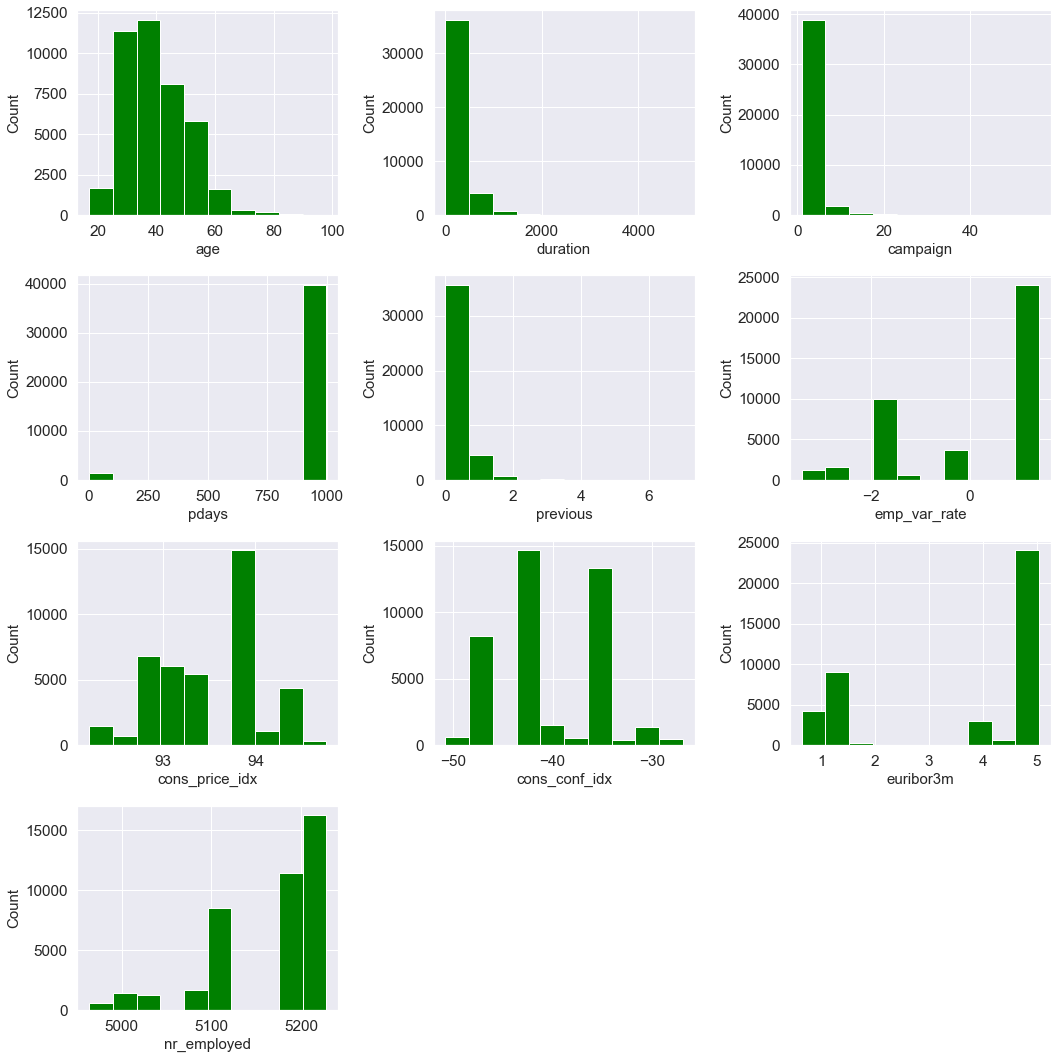

In [94]:
#univariant analysis of numerical features
data1=data[['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']]
plt.figure(figsize=(15,15))
plotnumber=1
for columns in data1:
    if plotnumber<12:
        plt.subplot(4,3,plotnumber)
        plt.hist(data1[columns],color='green')
        plt.xlabel(columns,fontsize=15)
        plt.ylabel('Count',fontsize=15)
        plotnumber+=1
plt.tight_layout()

visualization from data

Most of the customers in bank has age group in between 25 to 55 & very few customers are having age group in between  65-90.

Most of the customers contact duraction was 500 seconds i.e 8 minutes, while very few customers contact duration was 1500 sec i.e 25 minutes.

In campaign 2 to 6, many customers has been contacted, while in campaign 12 to 28 very few customers has been contacted

Most of the customers were contacted for the first time and rest of the customers were contacted in between 0 to 100 days from the campaign that was previously conducted. 

For most of the clients 0 to 8 number of contacts were performed before the campaign for the same client.

Most of the time Employement variation rate was posstive(1 to 1.5). and lowest employement variation rate was -1 to -1.5 and that too was for very less quarters.

Consumer price index was around 93.8 to 94 for most of the months and for very less number of months the consumer price index was above 94.5. from here we can conclude that there was inflation for the certain period of time as the change in the percentage has been increased more. 

For most of the months the Consumer confidense index was between -42 to -44 and around -35. which is good for banks as customers will spend very less amount of money on their expenditure and there saving will be more, so that the chances of customers to take term deposit may increased. 

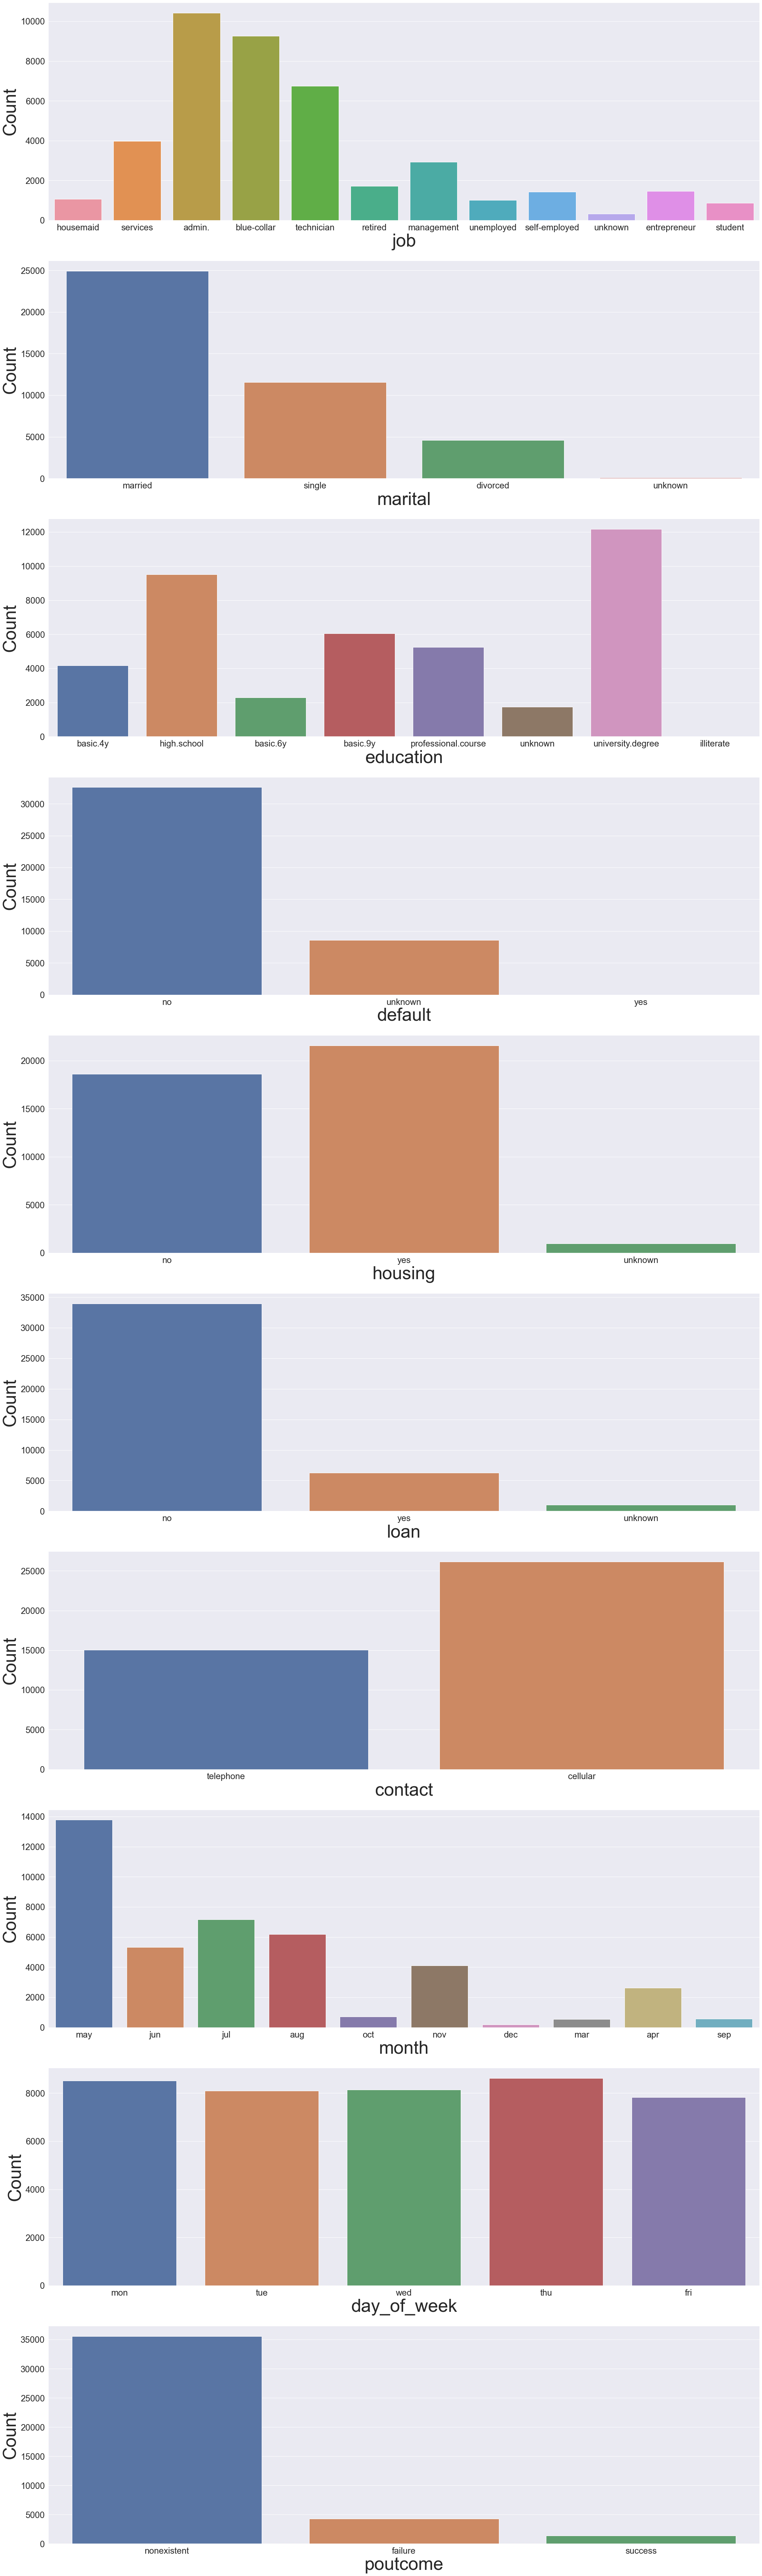

In [101]:
# Univariant analysis of catagorical features
sns.set(font_scale=2.2)
data1=data[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']]
plt.figure(figsize=(30,100))
plotnumber=1
for columns in data1:
    if plotnumber<11:
        plt.subplot(10,1,plotnumber)
        sns.countplot(data1[columns])
        plt.xlabel(columns,fontsize=50)
        plt.ylabel('Count',fontsize=50)
        plotnumber+=1
plt.tight_layout()

Most of the customers have job profile of "Admin","blue-collar","Technician"and "Services

Most of the customers are married and very less customers have marital status as devorced

Above 12000 customers have university degree and around 9000 customers are high school educated and very few customers are illeterate

All the customers whose defaulter status is known are not defaulter, some customers defaulter status is unknown.

Most of the customers have taken housing loan

Very few customers have taken personal loan, while most of the customers have not taken personal loan

Most of the customers have been contacted via cellular

Most of the customers have been contacted in the month of "May" and very few customers have been contacted in the month of "Dec".

Almost in all working days customers have been contacted

Outcome of previous marketting campaign is non-existent for most of the customers, while the suceess is for only fewer customers.

In [12]:
#Multivariant Analysis

In [13]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<AxesSubplot:xlabel='job', ylabel='count'>

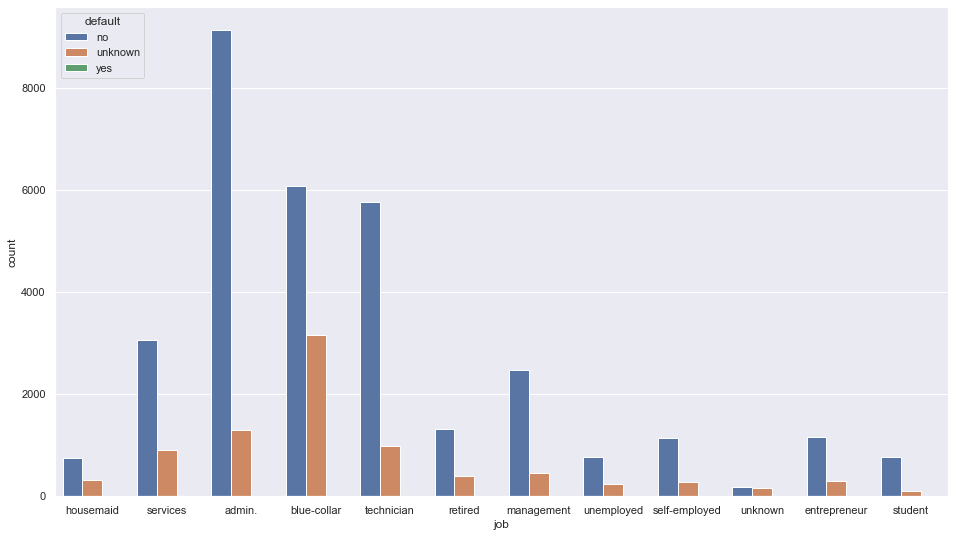

In [14]:
sns.set(font_scale=1)
plt.figure(figsize=(16,9))
sns.countplot(x=data.job,data=data,hue='default',saturation=0.75)

In [15]:
# Most of the customers in bank has job profile of admin,blue-collar and technician. and no customer is defaulter.

<AxesSubplot:xlabel='job', ylabel='count'>

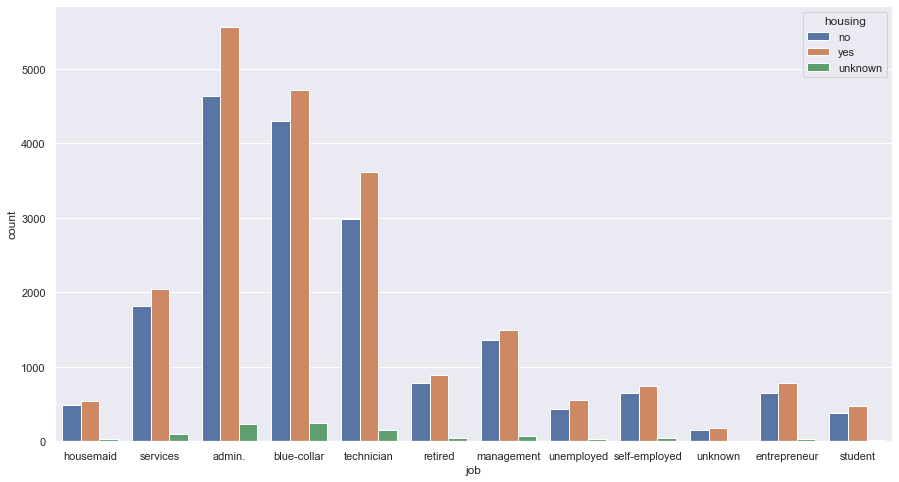

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x=data.job,data=data,hue='housing',saturation=0.75)

In [17]:
#All the customers with different different job profile have taken housing loan, but mostly the customers having job profile
#of admin,technician and blue-collar have taken loan for housing.

<AxesSubplot:xlabel='job', ylabel='count'>

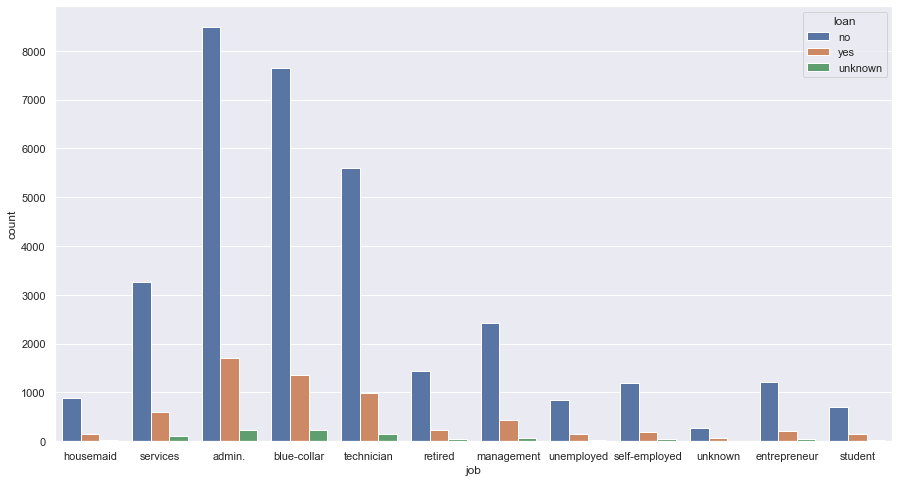

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x=data.job,data=data,hue='loan',saturation=0.75)

In [19]:
# Customer with job profile of admin,technician and blue-collar have taken more personal loan as compared to other customers.

<AxesSubplot:xlabel='count', ylabel='job'>

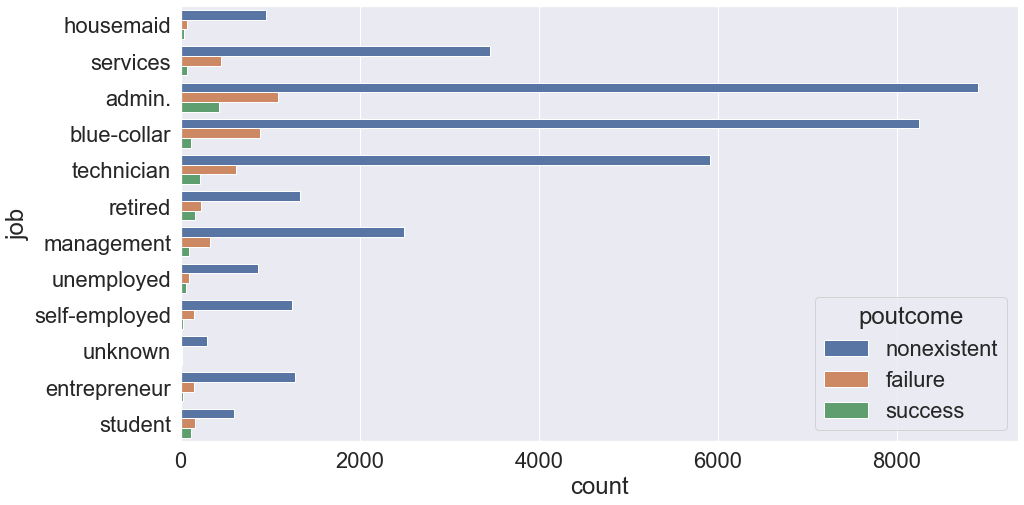

In [20]:
sns.set(font_scale=2)
plt.figure(figsize=(15,8))
sns.countplot(y=data.job,data=data,hue='poutcome',saturation=0.75)

In [21]:
# According to the the outcome of previous marketing campaign, the customers which are students and retired have taken more  
# term deposit as compared to other customers group.so, our target customers should be students and retired people.

<AxesSubplot:xlabel='age', ylabel='Count'>

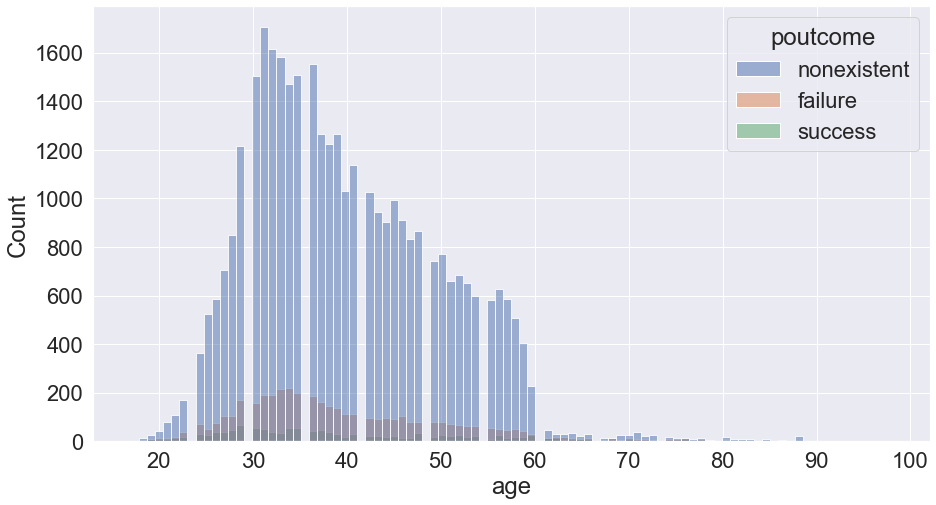

In [22]:
plt.figure(figsize=(15,8))
sns.histplot(x=data.age,data=data,hue='poutcome',color='purple')

In [23]:
#The customers of age group 25 to 35 are more likely to get our product

<AxesSubplot:xlabel='month', ylabel='count'>

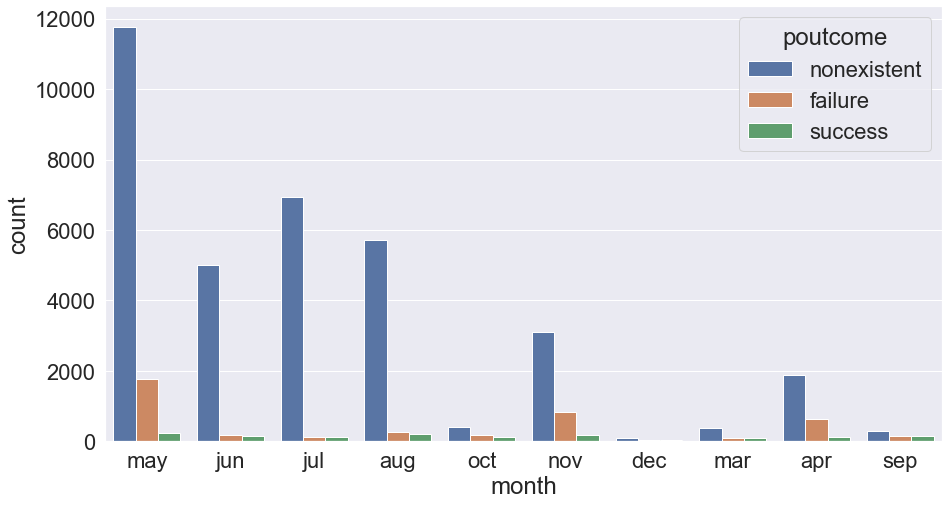

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(data.month,data=data,hue='poutcome')

In [25]:
#The customers which were contacted in the month of August,June and september have taken our product more, as comapred to the
#customers which were contacted in different month

In [28]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
 #mostly the customers which were contacted for a longer duration have taken the product.  

<AxesSubplot:xlabel='duration', ylabel='poutcome'>

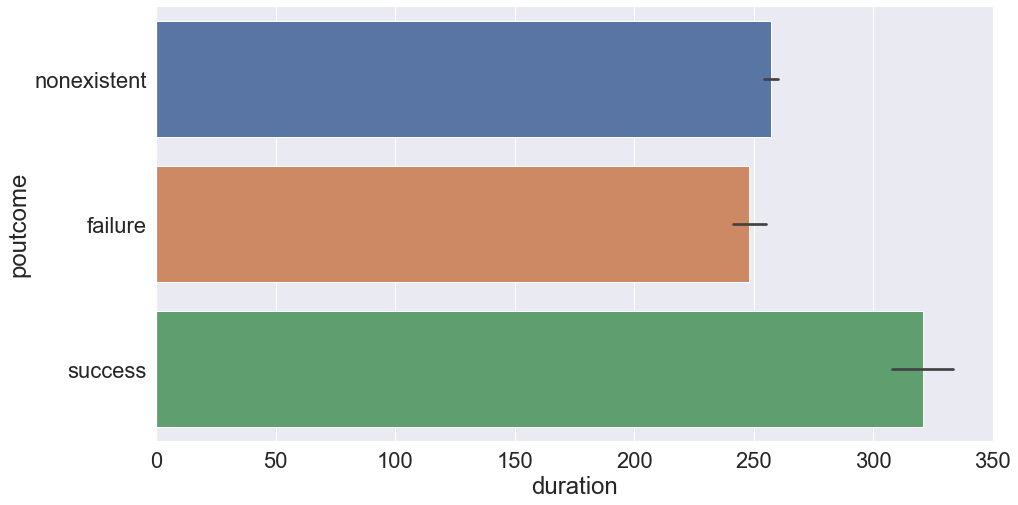

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(x='duration',y='poutcome',data=data)

In [32]:
#In previous campaign the customers which have been contacted for a longer duration have taken the product mostly.

In [33]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


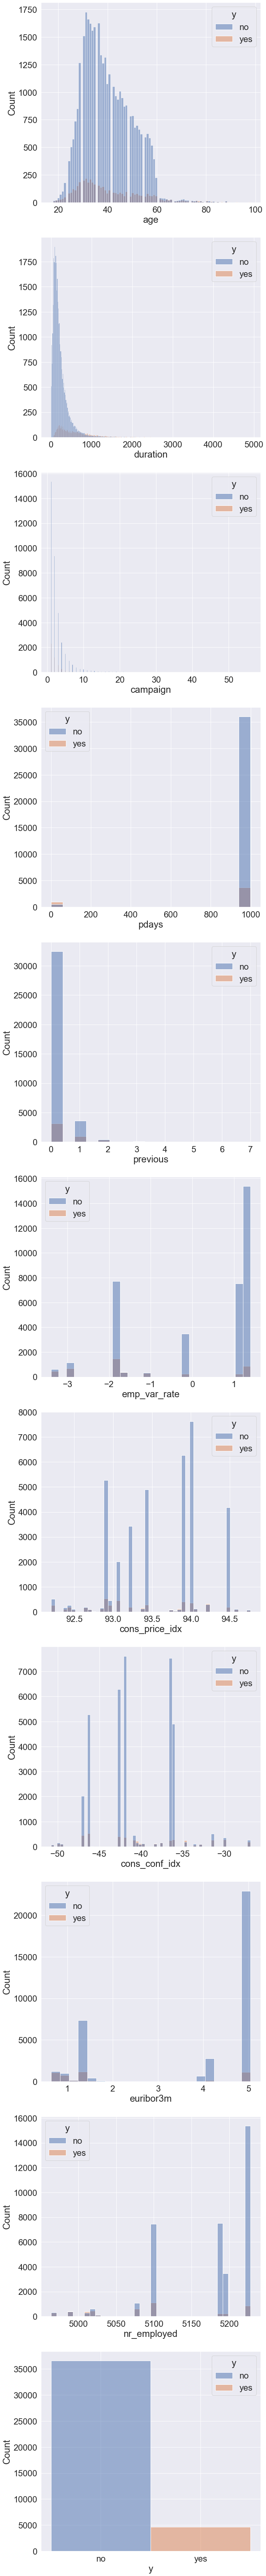

In [34]:
data1=data[['age','duration','campaign','pdays','previous','emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','y']]
plt.figure(figsize=(10,100))
plotnumber=1
for column in data1:
    if plotnumber<12:
        plt.subplot(12,1,plotnumber)
        sns.histplot(data=data1,x=data1[column],hue='y')
        plotnumber+=1
plt.tight_layout()

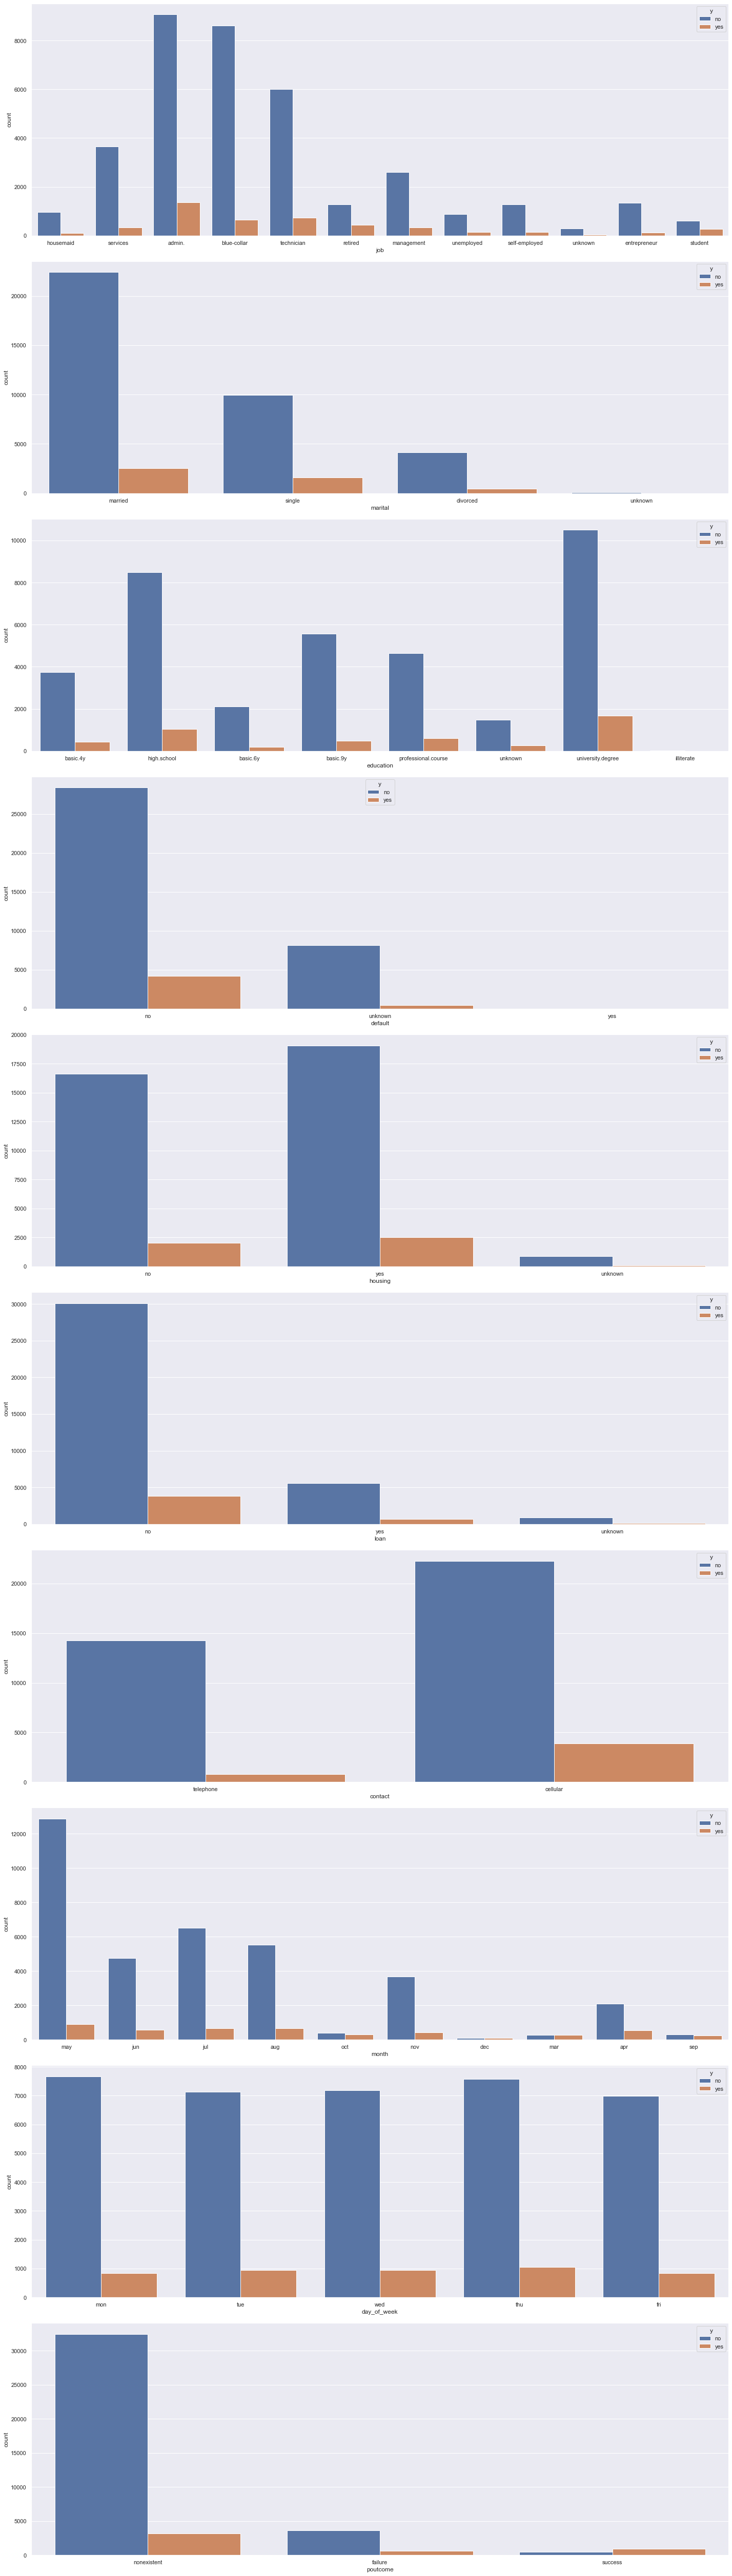

In [35]:
data1=data[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']]
sns.set(font_scale=1)
plt.figure(figsize=(20,70))
plotnumber=1
for columns in data1:
    if plotnumber<11:
        plt.subplot(10,1,plotnumber)
        sns.countplot(data1[columns],hue=data.y)
        plotnumber+=1
plt.tight_layout()

## Data Preprocessing

In [103]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [41]:
#there are no null values in our feature

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [43]:
#Now we will convert catagorical data to Numeric data

In [104]:
#Encoding y,default,housing,poutcome and Loan feature
data.y=data.y.map({'yes':1,'no':0})
data.default=data.default.map({'yes':1,'no':0,'unknown':0})
data.housing=data.housing.map({'yes':1,'no':0,'unknown':0})
data.loan=data.loan.map({'yes':1,'no':0,'unknown':0})
data.poutcome=data.poutcome.map({'success':1,'failure':0,'nonexistent':0})
data.day_of_week=data.day_of_week.map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5})
data.month=data.month.map({'may':1,'jun':2,'jul':3,'aug':4,'oct':5,'nov':6,'dec':7,'mar':8,'apr':9,'sep':10})
data.contact=data.contact.map({'telephone':1,'cellular':2})

In [105]:
data.pdays.replace(999,0,inplace=True) #replacing 999 with 0 (999 represents the customers not contacted previously)

In [106]:
from sklearn.preprocessing import LabelEncoder
LC=LabelEncoder()
data.job=LC.fit_transform(data.job)
data.marital=LC.fit_transform(data.marital)
data.education=LC.fit_transform(data.education)

In [107]:
data.shape

(41188, 21)

In [108]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['age','duration' ,'pdays','campaign','previous','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','emp_var_rate']]=scale.fit_transform(data[['age','duration' ,'pdays','campaign','previous','cons_price_idx','cons_conf_idx','euribor3m','nr_employed','emp_var_rate']])

In [109]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0.481481,3,1,0,0,0,0,1,1,1,0.053070,0.0,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,7,1,3,0,0,0,1,1,1,0.030297,0.0,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,7,1,3,0,1,0,1,1,1,0.045954,0.0,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,0,1,1,0,0,0,1,1,1,0.030704,0.0,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,7,1,3,0,0,1,1,1,1,0.062424,0.0,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0


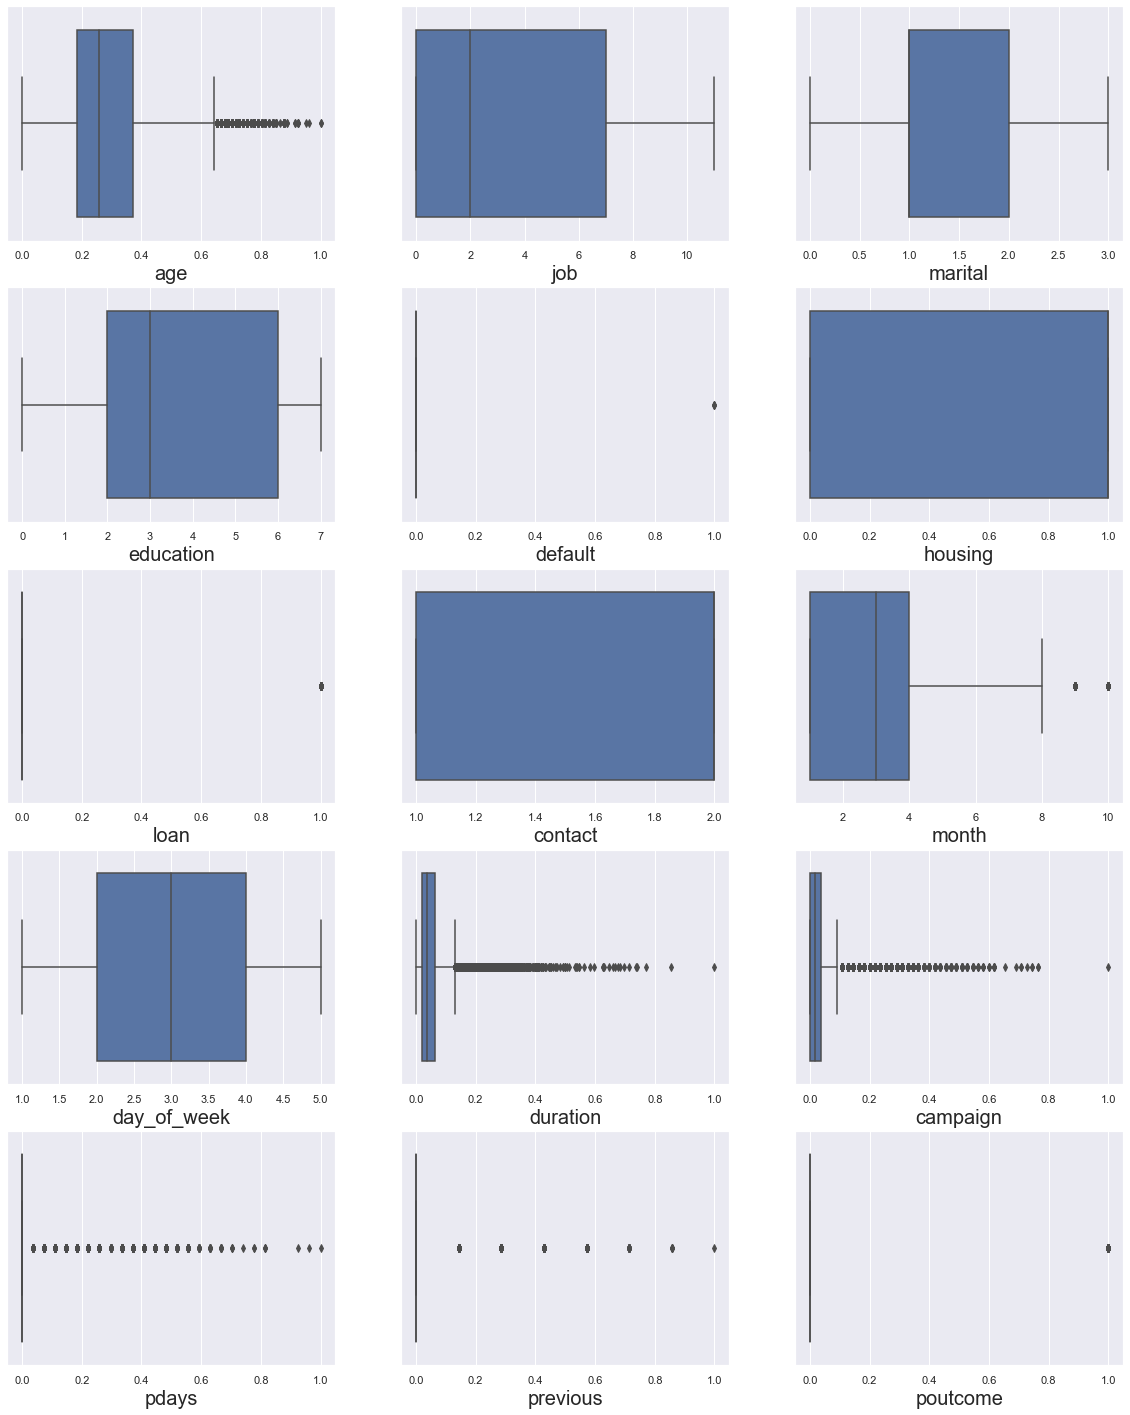

In [110]:
# Checking for outliers
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [ ]:
#we can see for Age,Duration,campaign,Pdays,cons_conf_inx,previous we have outliers.

In [115]:
# Size of dataset
display(data.shape[0]) # 3500
# size of data which are outliers
len(data.loc[data['age'] > upper_limit]) # 369
# percentage of data outliers
369/41188 *100
# If outlier percentage is greater than 5% than no treatment.

41188

0.8958920073807904

In [116]:
data.loc[data['age']>upper_limit,'age']=np.mean(data.age)#imputing value with mean
display(data.loc[data['age']>upper_limit])#recheck

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


In [117]:
from scipy import stats
#for duration (duration is non normal distribution so we used IQR for handling the outliers)
IQR = stats.iqr(data.duration, interpolation = 'midpoint') #calculating Inter quantile range
display('IQR is',IQR)
Q1=data.duration.quantile(0.25)#defining 25% of data
Q3=data.duration.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit
display('min limit is',min_limit)
max_limit=Q3 + 1.5*IQR #setting maximum limit
display('max limit is',max_limit)
display(data.loc[data['duration']<min_limit])
display(data.loc[data['duration']>max_limit])
# Size of dataset
display(data.shape[0]) # 3500
# size of data which are outliers
display(len(data.loc[data['duration'] > max_limit]))# 369
# percentage of data outliers
2963/41188 *100
# If outlier percentage is greater than 5% than no treatment.so,we will not handle outliers

'IQR is'

0.044123627490849936

'min limit is'

-0.04544530296868645

'max limit is'

0.13104920699471329

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
37,0.432099,9,1,2,0,1,0,1,1,1,0.338756,0.000000,0.000000,0.000000,0,0.937500,0.698753,0.60251,0.957379,0.859735,0
57,0.345679,7,1,3,0,1,0,1,1,1,0.160024,0.000000,0.000000,0.000000,0,0.937500,0.698753,0.60251,0.957379,0.859735,0
61,0.419753,1,1,2,0,1,0,1,1,1,0.165108,0.000000,0.000000,0.000000,0,0.937500,0.698753,0.60251,0.957379,0.859735,0
75,0.296296,1,0,0,0,1,0,1,1,1,0.320252,0.000000,0.000000,0.000000,0,0.937500,0.698753,0.60251,0.957379,0.859735,1
83,0.395062,2,1,6,0,1,0,1,1,1,0.211875,0.000000,0.000000,0.000000,0,0.937500,0.698753,0.60251,0.957379,0.859735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41147,0.098765,9,2,5,0,1,0,2,6,5,0.144774,0.018182,0.703704,0.142857,1,0.479167,1.000000,0.00000,0.092043,0.000000,1
41153,0.617284,3,0,5,0,1,0,2,6,1,0.133184,0.018182,0.185185,0.714286,1,0.479167,1.000000,0.00000,0.091816,0.000000,1
41160,0.197531,0,1,6,0,0,0,2,6,2,0.171411,0.000000,0.000000,0.000000,0,0.479167,1.000000,0.00000,0.090909,0.000000,1
41164,0.456790,0,1,5,0,0,0,2,6,2,0.379829,0.018182,0.370370,0.142857,1,0.479167,1.000000,0.00000,0.090909,0.000000,1


41188

2963

7.193842866854423

In [118]:
#for campaign (it is no normal distribtion so IQR is best approch)
IQR = stats.iqr(data.campaign, interpolation = 'midpoint') #calculating Inter quantile range
display('IQR is',IQR)
Q1=data.campaign.quantile(0.25)#defining 25% of data
Q3=data.campaign.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit
display('min limit is',min_limit)
max_limit=Q3 + 1.5*IQR #setting maximum limit
display('max limit is',max_limit)
display(data.loc[data['campaign']<min_limit])
display(data.loc[data['campaign']>max_limit])
# Size of dataset
display(data.shape[0]) # 3500
# size of data which are outliers
display(len(data.loc[data['duration'] > max_limit]))# 369
# percentage of data outliers
display(5974/41188 *100)
# If outlier percentage is greater than 5% than no treatment.so,we will not handle outliers

'IQR is'

0.03636363636363636

'min limit is'

-0.05454545454545454

'max limit is'

0.09090909090909091

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
887,0.456790,0,1,6,0,0,0,1,1,3,0.078894,0.109091,0.000000,0.000000,0,0.937500,0.698753,0.602510,0.957153,0.859735,0
1043,0.296296,9,2,6,0,0,0,1,1,3,0.016063,0.127273,0.000000,0.000000,0,0.937500,0.698753,0.602510,0.957153,0.859735,0
1094,0.283951,9,1,5,0,1,0,1,1,3,0.051444,0.127273,0.000000,0.000000,0,0.937500,0.698753,0.602510,0.957153,0.859735,0
1097,0.419753,1,1,0,0,1,0,1,1,3,0.049614,0.109091,0.000000,0.000000,0,0.937500,0.698753,0.602510,0.957153,0.859735,0
1230,0.382716,1,0,0,0,0,0,1,1,4,0.105937,0.109091,0.000000,0.000000,0,0.937500,0.698753,0.602510,0.956926,0.859735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,0.284248,5,1,2,0,0,0,1,10,5,0.110411,0.145455,0.000000,0.142857,0,0.479167,0.778644,0.556485,0.056450,0.000000,0
40631,0.284248,5,1,0,0,1,0,2,10,1,0.043310,0.109091,0.000000,0.000000,0,0.479167,0.778644,0.556485,0.056223,0.000000,0
40698,0.148148,9,2,5,0,1,0,2,10,1,0.031924,0.109091,0.111111,0.714286,1,0.479167,0.778644,0.556485,0.055543,0.000000,0
40821,0.197531,9,2,5,0,1,0,2,10,5,0.050020,0.145455,0.000000,0.285714,0,0.479167,0.778644,0.556485,0.055543,0.000000,0


41188

5974

14.504224531416918

In [119]:
#for pdays(it is no normal distribtion so IQR is best approch)
IQR = stats.iqr(data.pdays, interpolation = 'midpoint') #calculating Inter quantile range
display('IQR is',IQR)
Q1=data.pdays.quantile(0.25)#defining 25% of data
Q3=data.pdays.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit
display('min limit is',min_limit)
max_limit=Q3 + 1.5*IQR #setting maximum limit
display('max limit is',max_limit)
display(data.loc[data['pdays']<min_limit])
display(data.loc[data['pdays']>max_limit])
# Size of dataset
display(data.shape[0]) # 3500
# size of data which are outliers
display(len(data.loc[data['pdays'] > max_limit]))# 369
# percentage of data outliers
display(1413/41188 *100)
# If outlier percentage is greater than 5% than no treatment.
data.loc[data['pdays']>max_limit,'pdays']=np.median(data.pdays)#imputing outlier with with median
data.loc[data['pdays']>max_limit] #checking whether outlier remove or not

'IQR is'

0.0

'min limit is'

0.0

'max limit is'

0.0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
24108,0.246914,0,1,6,0,1,0,1,6,3,0.024197,0.000000,0.222222,0.142857,1,0.687500,0.389322,0.368201,0.827930,0.877883,0
24264,0.382716,4,1,6,0,1,0,2,6,1,0.022773,0.000000,0.148148,0.142857,1,0.687500,0.389322,0.368201,0.806393,0.877883,0
24279,0.308642,9,1,5,0,1,0,2,6,1,0.019113,0.000000,0.148148,0.142857,1,0.687500,0.389322,0.368201,0.806393,0.877883,0
24397,0.407407,2,1,6,0,1,0,2,6,1,0.015657,0.000000,0.111111,0.142857,1,0.687500,0.389322,0.368201,0.806393,0.877883,0
24482,0.234568,6,2,6,0,1,0,2,6,1,0.040667,0.018182,0.148148,0.142857,1,0.687500,0.389322,0.368201,0.806393,0.877883,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41163,0.222222,9,0,0,0,1,0,2,6,2,0.078284,0.036364,0.148148,0.285714,1,0.479167,1.000000,0.000000,0.090909,0.000000,1
41164,0.456790,0,1,5,0,0,0,2,6,2,0.379829,0.018182,0.370370,0.142857,1,0.479167,1.000000,0.000000,0.090909,0.000000,1
41174,0.555556,5,1,6,0,1,0,2,6,4,0.042294,0.000000,0.037037,0.857143,1,0.479167,1.000000,0.000000,0.090002,0.000000,1
41178,0.555556,5,1,6,0,0,0,2,6,4,0.098211,0.018182,0.222222,0.428571,1,0.479167,1.000000,0.000000,0.090002,0.000000,1


41188

1500

3.4306108575313194

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


In [120]:
#for pdays(it is no normal distribtion so IQR is best approch)
IQR = stats.iqr(data.previous, interpolation = 'midpoint') #calculating Inter quantile range
display('IQR is',IQR)
Q1=data.previous.quantile(0.25)#defining 25% of data
Q3=data.previous.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit
display('min limit is',min_limit)
max_limit=Q3 + 1.5*IQR #setting maximum limit
display('max limit is',max_limit)
display(data.loc[data['previous']<min_limit])
display(data.loc[data['previous']>max_limit])
# Size of dataset
display(data.shape[0]) # 3500
# size of data which are outliers
display(len(data.loc[data['previous'] > max_limit]))# 369
# percentage of data outliers
display(5625/41188 *100)
# If outlier percentage is greater than 5% than no treatment.
#data.loc[data['pdays']>max_limit,'pdays']=np.median(data.pdays)#imputing outlier with with median
#data.loc[data['pdays']>max_limit] #checking whether outlier remove or not

'IQR is'

0.0

'min limit is'

0.0

'max limit is'

0.0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
24013,0.259259,1,2,7,0,1,0,1,5,2,0.007930,0.000000,0.0,0.142857,0,0.687500,0.622369,0.435146,0.982544,0.877883,0
24019,0.283951,7,1,3,0,1,0,1,5,2,0.029280,0.000000,0.0,0.142857,0,0.687500,0.622369,0.435146,0.982544,0.877883,1
24076,0.234568,0,1,6,0,1,0,1,6,3,0.091297,0.000000,0.0,0.142857,0,0.687500,0.389322,0.368201,0.913398,0.877883,0
24102,0.234568,0,1,3,0,1,0,1,6,3,0.023180,0.000000,0.0,0.142857,0,0.687500,0.389322,0.368201,0.827930,0.877883,1
24108,0.246914,0,1,6,0,1,0,1,6,3,0.024197,0.000000,0.0,0.142857,1,0.687500,0.389322,0.368201,0.827930,0.877883,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,0.555556,5,1,6,0,1,0,2,6,4,0.042294,0.000000,0.0,0.857143,1,0.479167,1.000000,0.000000,0.090002,0.000000,1
41175,0.209877,8,2,7,0,1,0,2,6,4,0.036600,0.000000,0.0,0.285714,0,0.479167,1.000000,0.000000,0.090002,0.000000,0
41178,0.555556,5,1,6,0,0,0,2,6,4,0.098211,0.018182,0.0,0.428571,1,0.479167,1.000000,0.000000,0.090002,0.000000,1
41182,0.148148,10,2,0,0,1,0,2,6,5,0.022773,0.000000,0.0,0.142857,1,0.479167,1.000000,0.000000,0.089322,0.000000,0


41188

5625

13.65689035641449

In [121]:
#for pdays(it is no normal distribtion so IQR is best approch)
IQR = stats.iqr(data.default, interpolation = 'midpoint') #calculating Inter quantile range
display('IQR is',IQR)
Q1=data.default.quantile(0.25)#defining 25% of data
Q3=data.default.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit
display('min limit is',min_limit)
max_limit=Q3 + 1.5*IQR #setting maximum limit
display('max limit is',max_limit)
display(data.loc[data['default']<min_limit])
display(data.loc[data['default']>max_limit])
# Size of dataset
display(data.shape[0]) # 3500
# size of data which are outliers
display(len(data.loc[data['default'] > max_limit]))# 369
# percentage of data outliers
display(3/41188 *100)
# If outlier percentage is greater than 5% than no treatment.
data.loc[data['default']>max_limit,'default']=np.median(data.default)#imputing outlier with with median
data.loc[data['default']>max_limit] #checking whether outlier remove or not

'IQR is'

0.0

'min limit is'

0.0

'max limit is'

0.0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
21580,0.382716,9,1,5,1,0,0,2,4,2,0.013420,0.000000,0.0,0.000000,0,1.0000,0.484412,0.615063,0.981410,1.000000,0
21581,0.382716,9,1,5,1,1,0,2,4,2,0.027044,0.000000,0.0,0.000000,0,1.0000,0.484412,0.615063,0.981410,1.000000,0
24866,0.172840,10,1,3,1,0,0,2,6,2,0.022570,0.018182,0.0,0.142857,0,0.6875,0.389322,0.368201,0.797778,0.877883,0


41188

3

0.007283674856754395

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


In [122]:
#checking duplicate values
data.duplicated().sum()

14

In [123]:
# removing duplicate values
data.drop_duplicates(keep=False, inplace=True)
display(data.duplicated().sum())

0

In [124]:
data.y.value_counts()

0    36522
1     4638
Name: y, dtype: int64

## Feature Selection

<AxesSubplot:>

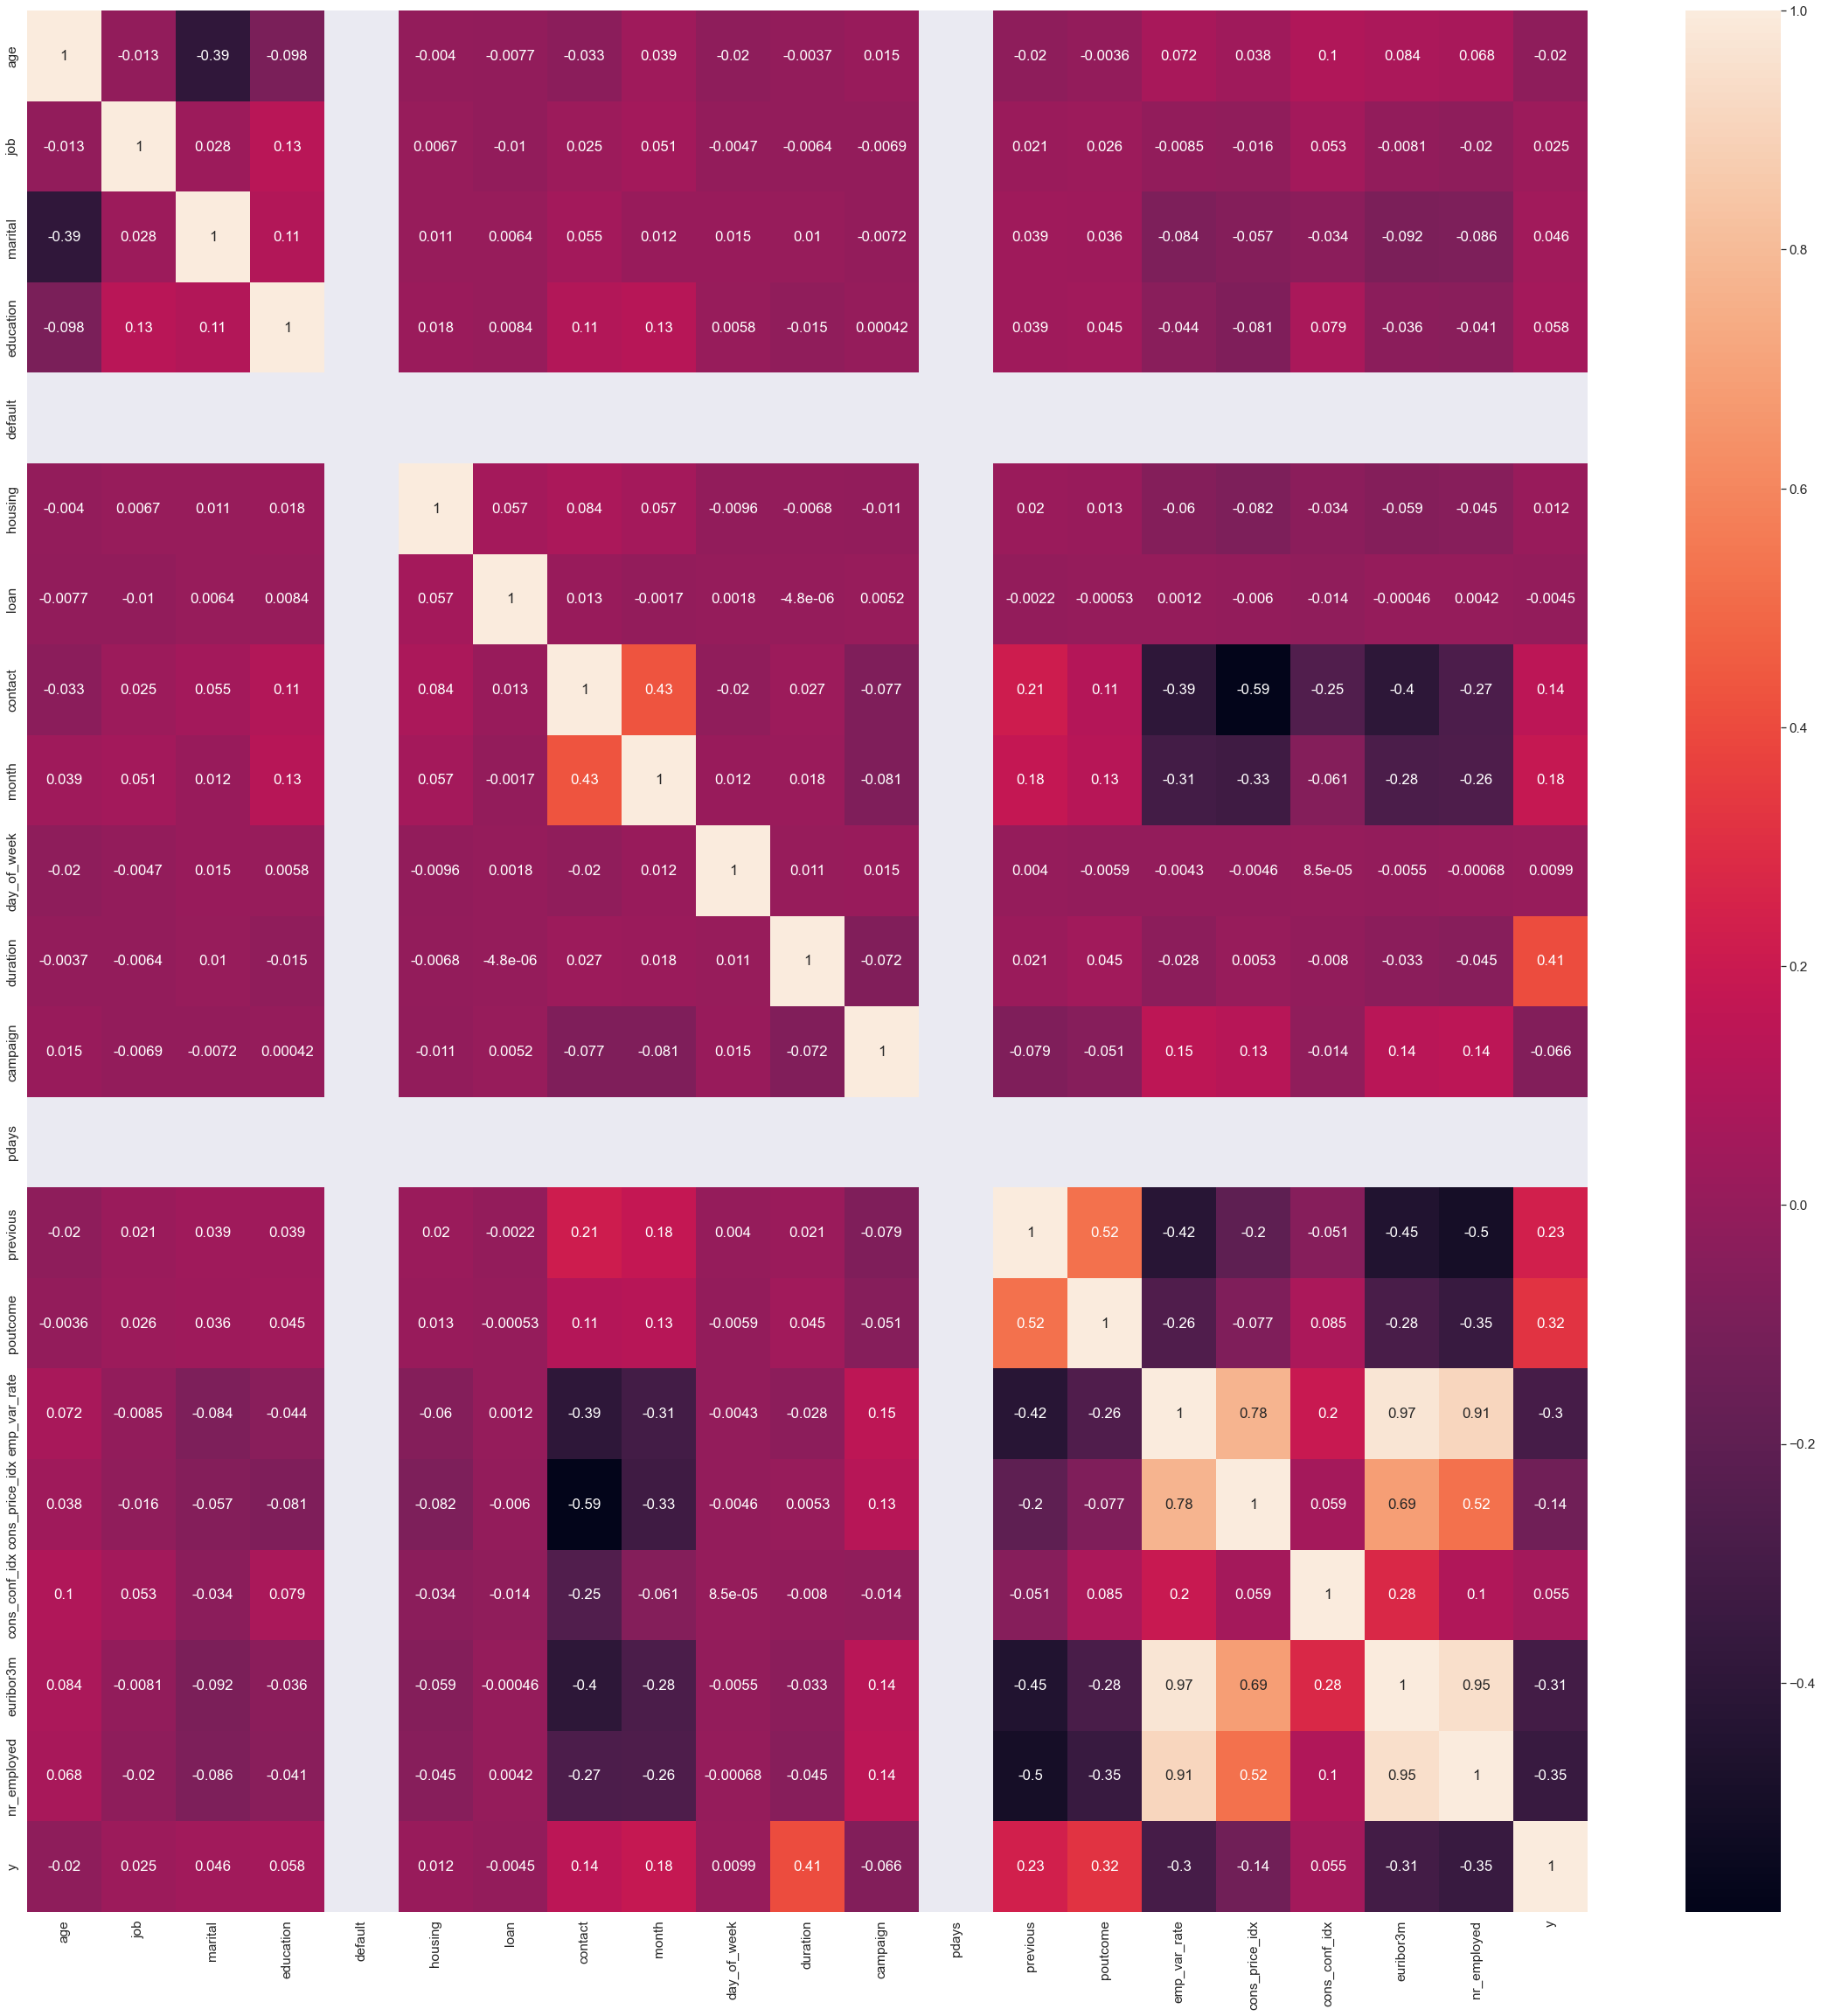

In [125]:
sns.set(font_scale=1.4)
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(),annot=True)

### From correlation matrix we observe next:
* most correlated with target feature is call duration.
* higly correlated features (employment variation rate,nr_employed,euribor3m)

In [126]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0.481481,3,1,0,0,0,0,1,1,1,0.053070,0.0,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,7,1,3,0,0,0,1,1,1,0.030297,0.0,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,7,1,3,0,1,0,1,1,1,0.045954,0.0,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,0,1,1,0,0,0,1,1,1,0.030704,0.0,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,7,1,3,0,0,1,1,1,1,0.062424,0.0,0.0,0.0,0,0.9375,0.698753,0.60251,0.957379,0.859735,0


In [127]:
data.drop(["emp_var_rate","euribor3m"], axis=1, inplace=True) #droping employee variation rate and euribor 3 month rate

# Model Building

In [128]:
x= data.iloc[:,0:-1]
y=data.y

In [129]:
data.y.value_counts() #As our datset is imbalanced we need to balance this by using SMOTE

0    36522
1     4638
Name: y, dtype: int64

In [131]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x,y)

In [132]:
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 36522, 1: 4638})
SMOTE Classes Counter({0: 36522, 1: 36522})


In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote)
random_state=42

In [134]:
display('check the shape of splitted train and test sets', x_train.shape, y_train.shape, x_test.shape, y_test.shape)

'check the shape of splitted train and test sets'

(54783, 18)

(54783,)

(18261, 18)

(18261,)

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


model_pipeline =[]
model_pipeline.append(LogisticRegression(solver="liblinear"))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [73]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

model_list = ["Logistic Regression","SVM","KNN","Decision Tree","Random Tree","Naive Bayes"]
acc_list=[]
auc_list=[]
cm_list=[]
pre_list=[]
Recall_list=[]
F1_score=[]
Classic_report=[]
  

for model in model_pipeline:
    model.fit(x_train,y_train)
    y_pred= model.predict(x_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr,tpr, _thresholds =metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))
    pre_list.append(precision_score(y_test,y_pred))
    Recall_list.append(recall_score(y_test,y_pred))
    F1_score.append(f1_score(y_test,y_pred))
    Classic_report.append(classification_report(y_test,y_pred))

In [74]:
result=pd.DataFrame({"Model":model_list, "Accuracy":acc_list,"AUC":auc_list,"Precision_score":pre_list,"recall_score":Recall_list,"f1_score":F1_score,"confusion_matrix":cm_list})
result

,Model,Accuracy,AUC,Precision_score,recall_score,f1_score,confusion_matrix
0,Logistic Regression,0.872515,0.87,0.857738,0.889492,0.873327,"[[7908, 1331], [997, 8025]]"
1,SVM,0.868080,0.87,0.842962,0.900798,0.870921,"[[7725, 1514], [895, 8127]]"
2,KNN,0.885713,0.89,0.849370,0.934383,0.889851,"[[7744, 1495], [592, 8430]]"
3,Decision Tree,0.915996,0.92,0.906250,0.925737,0.915890,"[[8375, 864], [670, 8352]]"
4,Random Tree,0.944198,0.94,0.921078,0.970184,0.944993,"[[8489, 750], [269, 8753]]"
5,Naive Bayes,0.793823,0.79,0.816344,0.751829,0.782759,"[[7713, 1526], [2239, 6783]]"


In [75]:
probs=model.predict_proba(x_test)[:,1]

In [76]:
## Defining the threshold limit
def predict_threshold (model,x_test,thresholds):
    return np.where(model.predict_proba(x_test)[:,1]>thresholds,1,0)#checking where probability of class 1 is  greater than threshold

In [77]:
## visualizing the roc plot
def roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

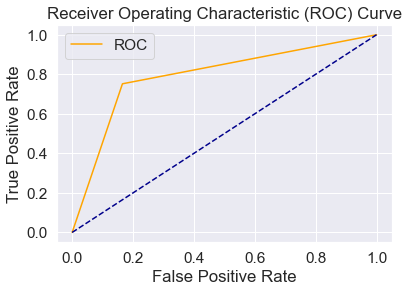

In [78]:
import matplotlib.pyplot as plt
roc_curve(fpr, tpr)#plotting ruc curve

## Model Comparison Report
* On comparing the accuracy of all the models we got good accuracy of 94 % in Random Forest Classifier algorithm. Hence we will use Random Forest algorithm for our future predictions.

## Conclusions and recomendations
What general recommendations can be offered for a successful marketing company in the future?

This analysis can be carried out at the level of individual bank branches as does not require much resources and special knowledge (the model itself can be launched automatically with a certain periodicity). 

Potentially similar micro-targeting will increase the overall effectiveness of the entire marketing company.

1. Take into account the time of the company (March,September and october)
2. Increase the time of contact with customers (perhaps in a different way formulating the goal of the company). we should try to contact the people via cellular mode and it is also possible to use other means of communication.
3. Focus on specific categories. The model shows that students and senior citizens respond better to proposal.
4. It is imperative to form target groups based on socio-economic categories. Age, income level (not always high), profession can accurately determine the marketing profile of a potential client.

Given these factors, it is recommended to **concentrate on those consumer groups** that are potentially more promising.

The concentration of the bank’s efforts will effectively distribute the company’s resources to the main factor - the bank’s contact time with the client - it affects most of all on conversion.

The continuation of such a study may be the **formation of a clear customer profile** - by age, gender, income and other factors, as well as the adaptation of the product itself (deposit) for a specific category of consumer.


## Report on Challenges faced

* While encoding catagorical data into numerical data, for certain features we cannot predict the numerical values manually as it depend on domain knowledge. hence we have used Label encoder for these features.
* In EDA some feature showing uniform distribution so it was difficult to predict the relationship between features.